In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
df_train=pd.read_csv('../input/digit-recognizer/train.csv')

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import matplotlib.pyplot as plt

In [5]:
train_lable= df_train['label']
train_data= df_train.drop('label', axis=1)

In [6]:
train_data.shape

(42000, 784)

In [7]:
train_data=np.array(train_data)


In [8]:
train_data1=train_data.reshape(42000,28,28)/255

In [9]:
train_data1.shape, train_lable.shape, train_data.shape

((42000, 28, 28), (42000,), (42000, 784))

In [10]:
train_data=train_data/255


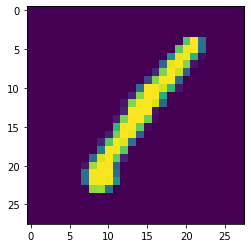

In [11]:
plt.imshow(train_data1[0])

In [12]:
from tensorflow.keras.utils import to_categorical
train_lable=to_categorical(train_lable, num_classes=10)

In [13]:
train_lable.shape

(42000, 10)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [15]:
model= Sequential()
'''model.add(Conv2D(32,(5,5), activation='relu', input_shape=(28,28,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())'''
model.add(Dense(80, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))


In [16]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                62800     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                810       
Total params: 63,610
Trainable params: 63,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(train_data, train_lable, epochs=20)
#model.fit_generator(train_data1, steps_per_epoch=len(train_data1), epochs=10)

Epoch 1/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5344 - accuracy: 0.8486
Epoch 2/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1607 - accuracy: 0.9539
Epoch 3/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1046 - accuracy: 0.9699
Epoch 4/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0825 - accuracy: 0.9740
Epoch 5/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0642 - accuracy: 0.9811
Epoch 6/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0500 - accuracy: 0.9852
Epoch 7/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0380 - accuracy: 0.9893
Epoch 8/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0324 - accuracy: 0.9910
Epoch 9/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0293 - accuracy: 0.9911
Epoch 10/20
1313/1313 [==============================] - 2s 1ms/step - loss: 0.023

In [19]:
test_data=pd.read_csv('../input/digit-recognizer/test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test_data.shape

(28000, 784)

In [21]:
test_data=np.array(test_data)

In [22]:
test_data1=test_data.reshape(28000,28,28)/255

In [23]:
test_data1.shape

(28000, 28, 28)

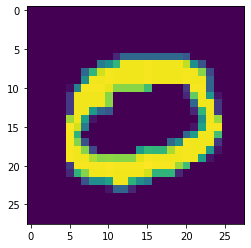

In [24]:
plt.imshow(test_data1[1])

In [25]:
import tensorflow as tf
prediction = model(test_data)
prediction = tf.nn.softmax(prediction).numpy() #Shows probabilities
prediction[1]

array([0.23196931, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
      dtype=float32)

In [26]:
prediction = [np.argmax(predict) for predict in prediction]
print(prediction[1])
#plt.imshow(test_data1[0])

0


In [27]:
submission_df = {'ImageId' : range(1, len(prediction)+1), 'Label' : prediction}
submission_df = pd.DataFrame(data=submission_df)
submission_df.head(3)

,ImageId,Label
0,1,2
1,2,0
2,3,9


In [28]:
submission_df.to_csv('./submission1.csv', index=False)